In [19]:
import numpy as np
import matplotlib.pyplot as plt

Manually generate data

In [9]:
def f(x):
    return np.sin(2*np.pi*x)
#Define Feature
Feature = np.random.rand(50)
Feature=np.sort(Feature)
#Define Label
Label=f(Feature)+np.random.normal(scale=0.1,size=Feature.shape)

Define Gaussian Kernal(Cr:Pattern recognition and machine learning, chapter 6)

In [50]:
def GaussianKernal(x1,x2):
    sigma=0.1
    return np.exp(-(np.abs(x1-x2))**2/(2*sigma**2))


In [51]:
def ApplyKernal(xs1,xs2):
    tmp2 = []

    for x1 in xs1:
        tmp = []
        for x2 in xs2:
            tmp.append(GaussianKernal(x1, x2))
        tmp2.append(tmp)

    return np.array(tmp2)

ApplyKernal(Feature, Feature)

array([[1.00000000e+00, 9.95130191e-01, 9.87679386e-01, ...,
        1.51085824e-21, 1.40949209e-21, 1.30801020e-21],
       [9.95130191e-01, 1.00000000e+00, 9.98281448e-01, ...,
        3.95643408e-21, 3.69357653e-21, 3.43022565e-21],
       [9.87679386e-01, 9.98281448e-01, 1.00000000e+00, ...,
        6.97371659e-21, 6.51310462e-21, 6.05142707e-21],
       ...,
       [1.51085824e-21, 3.95643408e-21, 6.97371659e-21, ...,
        1.00000000e+00, 9.99974868e-01, 9.99891780e-01],
       [1.40949209e-21, 3.69357653e-21, 6.51310462e-21, ...,
        9.99974868e-01, 1.00000000e+00, 9.99970949e-01],
       [1.30801020e-21, 3.43022565e-21, 6.05142707e-21, ...,
        9.99891780e-01, 9.99970949e-01, 1.00000000e+00]])

Define Covariance Matrix 

In [61]:
beta=1

def CovarianceMatrix(xs):
    return ApplyKernal(xs, xs) + 1/beta*(np.identity(xs.shape[0]))


Prediction


In [62]:
def prediction(x_test):
    MN=ApplyKernal(Feature,[x_test]).transpose()@np.linalg.inv(CovarianceMatrix(Feature))@Label
    SN=ApplyKernal([x_test], [x_test]) + 1/beta - ApplyKernal(Feature,[0.5]).transpose()@np.linalg.inv(CovarianceMatrix(Feature))@ApplyKernal(Feature,[0.5])
    return (MN, SN)

Make plot based on prediction

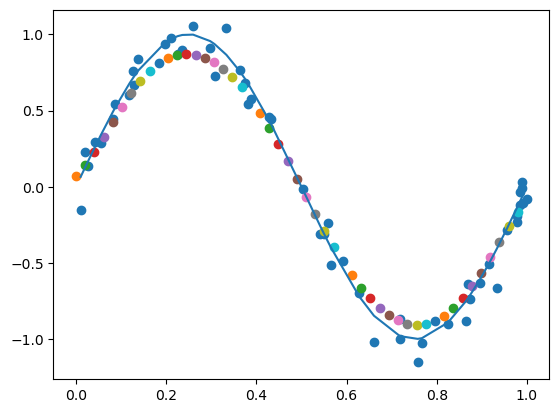

In [63]:
plt.plot(Feature, f(Feature))
plt.scatter(Feature, Label)
for i in np.linspace(0, 1, 50):
    plt.scatter(i, prediction(i)[0])